In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv("archive.csv")
data.head()

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),temperature_2m_mean (Â°C),apparent_temperature_max (Â°C),apparent_temperature_min (Â°C),apparent_temperature_mean (Â°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h)
0,2019-03-01,20.0,12.6,16.0,18.0,10.4,13.7,0.5,0.5,2,16.0
1,2019-03-02,15.7,11.3,13.5,14.6,8.3,11.6,5.1,5.1,10,19.5
2,2019-03-03,16.5,11.0,13.8,14.4,8.5,11.5,2.5,2.5,8,19.3
3,2019-03-04,21.0,9.4,15.8,20.0,7.9,14.5,0.0,0.0,0,10.8
4,2019-03-05,23.8,8.5,16.9,23.7,6.9,16.1,0.0,0.0,0,8.7


In [34]:
# Descriptive statistics
#----------------------------------------------------------------

data.describe()

,temperature_2m_max (Â°C),temperature_2m_min (Â°C),temperature_2m_mean (Â°C),apparent_temperature_max (Â°C),apparent_temperature_min (Â°C),apparent_temperature_mean (Â°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h)
count,1570.000000,1570.000000,1569.000000,1570.000000,1570.000000,1569.000000,1569.000000,1569.000000,1571.000000,1570.000000
mean,32.138790,20.069936,25.993308,33.540255,20.755159,26.873359,0.908094,0.908094,1.073202,12.956624
std,7.598058,8.163803,7.860721,9.610176,10.298338,9.789176,4.384543,4.384543,2.922849,4.437111
min,10.700000,1.900000,8.300000,8.400000,-1.300000,6.000000,0.000000,0.000000,0.000000,4.200000
25%,26.000000,12.900000,19.100000,25.400000,11.700000,18.400000,0.000000,0.000000,0.000000,9.600000
50%,33.950000,21.200000,27.900000,35.800000,21.100000,28.400000,0.000000,0.000000,0.000000,11.700000
75%,38.175000,27.200000,32.500000,41.800000,30.575000,35.800000,0.000000,0.000000,0.000000,15.300000
max,46.700000,33.500000,38.200000,48.400000,38.700000,42.100000,115.000000,115.000000,24.000000,32.100000


In [35]:
# Shows non-null value counts and data types for columns
#----------------------------------------------------------------

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1571 non-null   object 
 1   temperature_2m_max (Â°C)         1570 non-null   float64
 2   temperature_2m_min (Â°C)         1570 non-null   float64
 3   temperature_2m_mean (Â°C)        1569 non-null   float64
 4   apparent_temperature_max (Â°C)   1570 non-null   float64
 5   apparent_temperature_min (Â°C)   1570 non-null   float64
 6   apparent_temperature_mean (Â°C)  1569 non-null   float64
 7   precipitation_sum (mm)           1569 non-null   float64
 8   rain_sum (mm)                    1569 non-null   float64
 9   precipitation_hours (h)          1571 non-null   int64  
 10  windspeed_10m_max (km/h)         1570 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 135.1+ KB


In [36]:
# True where values are null
#----------------------------------------------------------------

data.isna()

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),temperature_2m_mean (Â°C),apparent_temperature_max (Â°C),apparent_temperature_min (Â°C),apparent_temperature_mean (Â°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1566,False,False,False,False,False,False,False,False,False,False,False
1567,False,False,False,False,False,False,False,False,False,False,False
1568,False,False,False,False,False,False,False,False,False,False,False
1569,False,False,False,True,False,False,True,True,True,False,False


In [37]:
# The following lines are used to fill all the missing values in the columns
#----------------------------------------------------------------

mean = data.mean()

for i,e in enumerate(data.iloc[:,1:]):

    formatted_mean = float("{:.4f}".format(mean[i]))
    data[e].fillna(value=formatted_mean, inplace=True)



In [38]:
# Truncated missing values
#----------------------------------------------------------------

data.tail()

,time,temperature_2m_max (Â°C),temperature_2m_min (Â°C),temperature_2m_mean (Â°C),apparent_temperature_max (Â°C),apparent_temperature_min (Â°C),apparent_temperature_mean (Â°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h)
1566,2023-06-14,40.4000,31.8000,35.8000,42.4000,32.2000,37.0000,0.0000,0.0000,0,28.4000
1567,2023-06-15,39.0000,31.2000,34.8000,41.4000,31.9000,36.3000,0.0000,0.0000,0,28.4000
1568,2023-06-16,38.7000,29.1000,33.9000,43.4000,32.5000,37.8000,0.1000,0.1000,1,10.3000
1569,2023-06-17,31.9000,30.0000,25.9933,35.8000,33.4000,26.8734,0.9081,0.9081,0,12.3000
1570,2023-06-18,32.1388,20.0699,25.9933,33.5403,20.7552,26.8734,0.9081,0.9081,0,12.9566


In [39]:
# Datatypes before modification
#----------------------------------------------------------------

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             1571 non-null   object 
 1   temperature_2m_max (Â°C)         1571 non-null   float64
 2   temperature_2m_min (Â°C)         1571 non-null   float64
 3   temperature_2m_mean (Â°C)        1571 non-null   float64
 4   apparent_temperature_max (Â°C)   1571 non-null   float64
 5   apparent_temperature_min (Â°C)   1571 non-null   float64
 6   apparent_temperature_mean (Â°C)  1571 non-null   float64
 7   precipitation_sum (mm)           1571 non-null   float64
 8   rain_sum (mm)                    1571 non-null   float64
 9   precipitation_hours (h)          1571 non-null   int64  
 10  windspeed_10m_max (km/h)         1571 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 135.1+ KB


In [40]:
# Neural Prophet requires the time series to be in datetime format
#----------------------------------------------------------------

data['time'] = pd.to_datetime(data['time'])

# Datatypes after modification
#----------------------------------------------------------------

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   time                             1571 non-null   datetime64[ns]
 1   temperature_2m_max (Â°C)         1571 non-null   float64       
 2   temperature_2m_min (Â°C)         1571 non-null   float64       
 3   temperature_2m_mean (Â°C)        1571 non-null   float64       
 4   apparent_temperature_max (Â°C)   1571 non-null   float64       
 5   apparent_temperature_min (Â°C)   1571 non-null   float64       
 6   apparent_temperature_mean (Â°C)  1571 non-null   float64       
 7   precipitation_sum (mm)           1571 non-null   float64       
 8   rain_sum (mm)                    1571 non-null   float64       
 9   precipitation_hours (h)          1571 non-null   int64         
 10  windspeed_10m_max (km/h)         1571 non-null   float64    

In [41]:
#Plotting all features
#----------------------------------------------------------------

sns.pairplot(data)

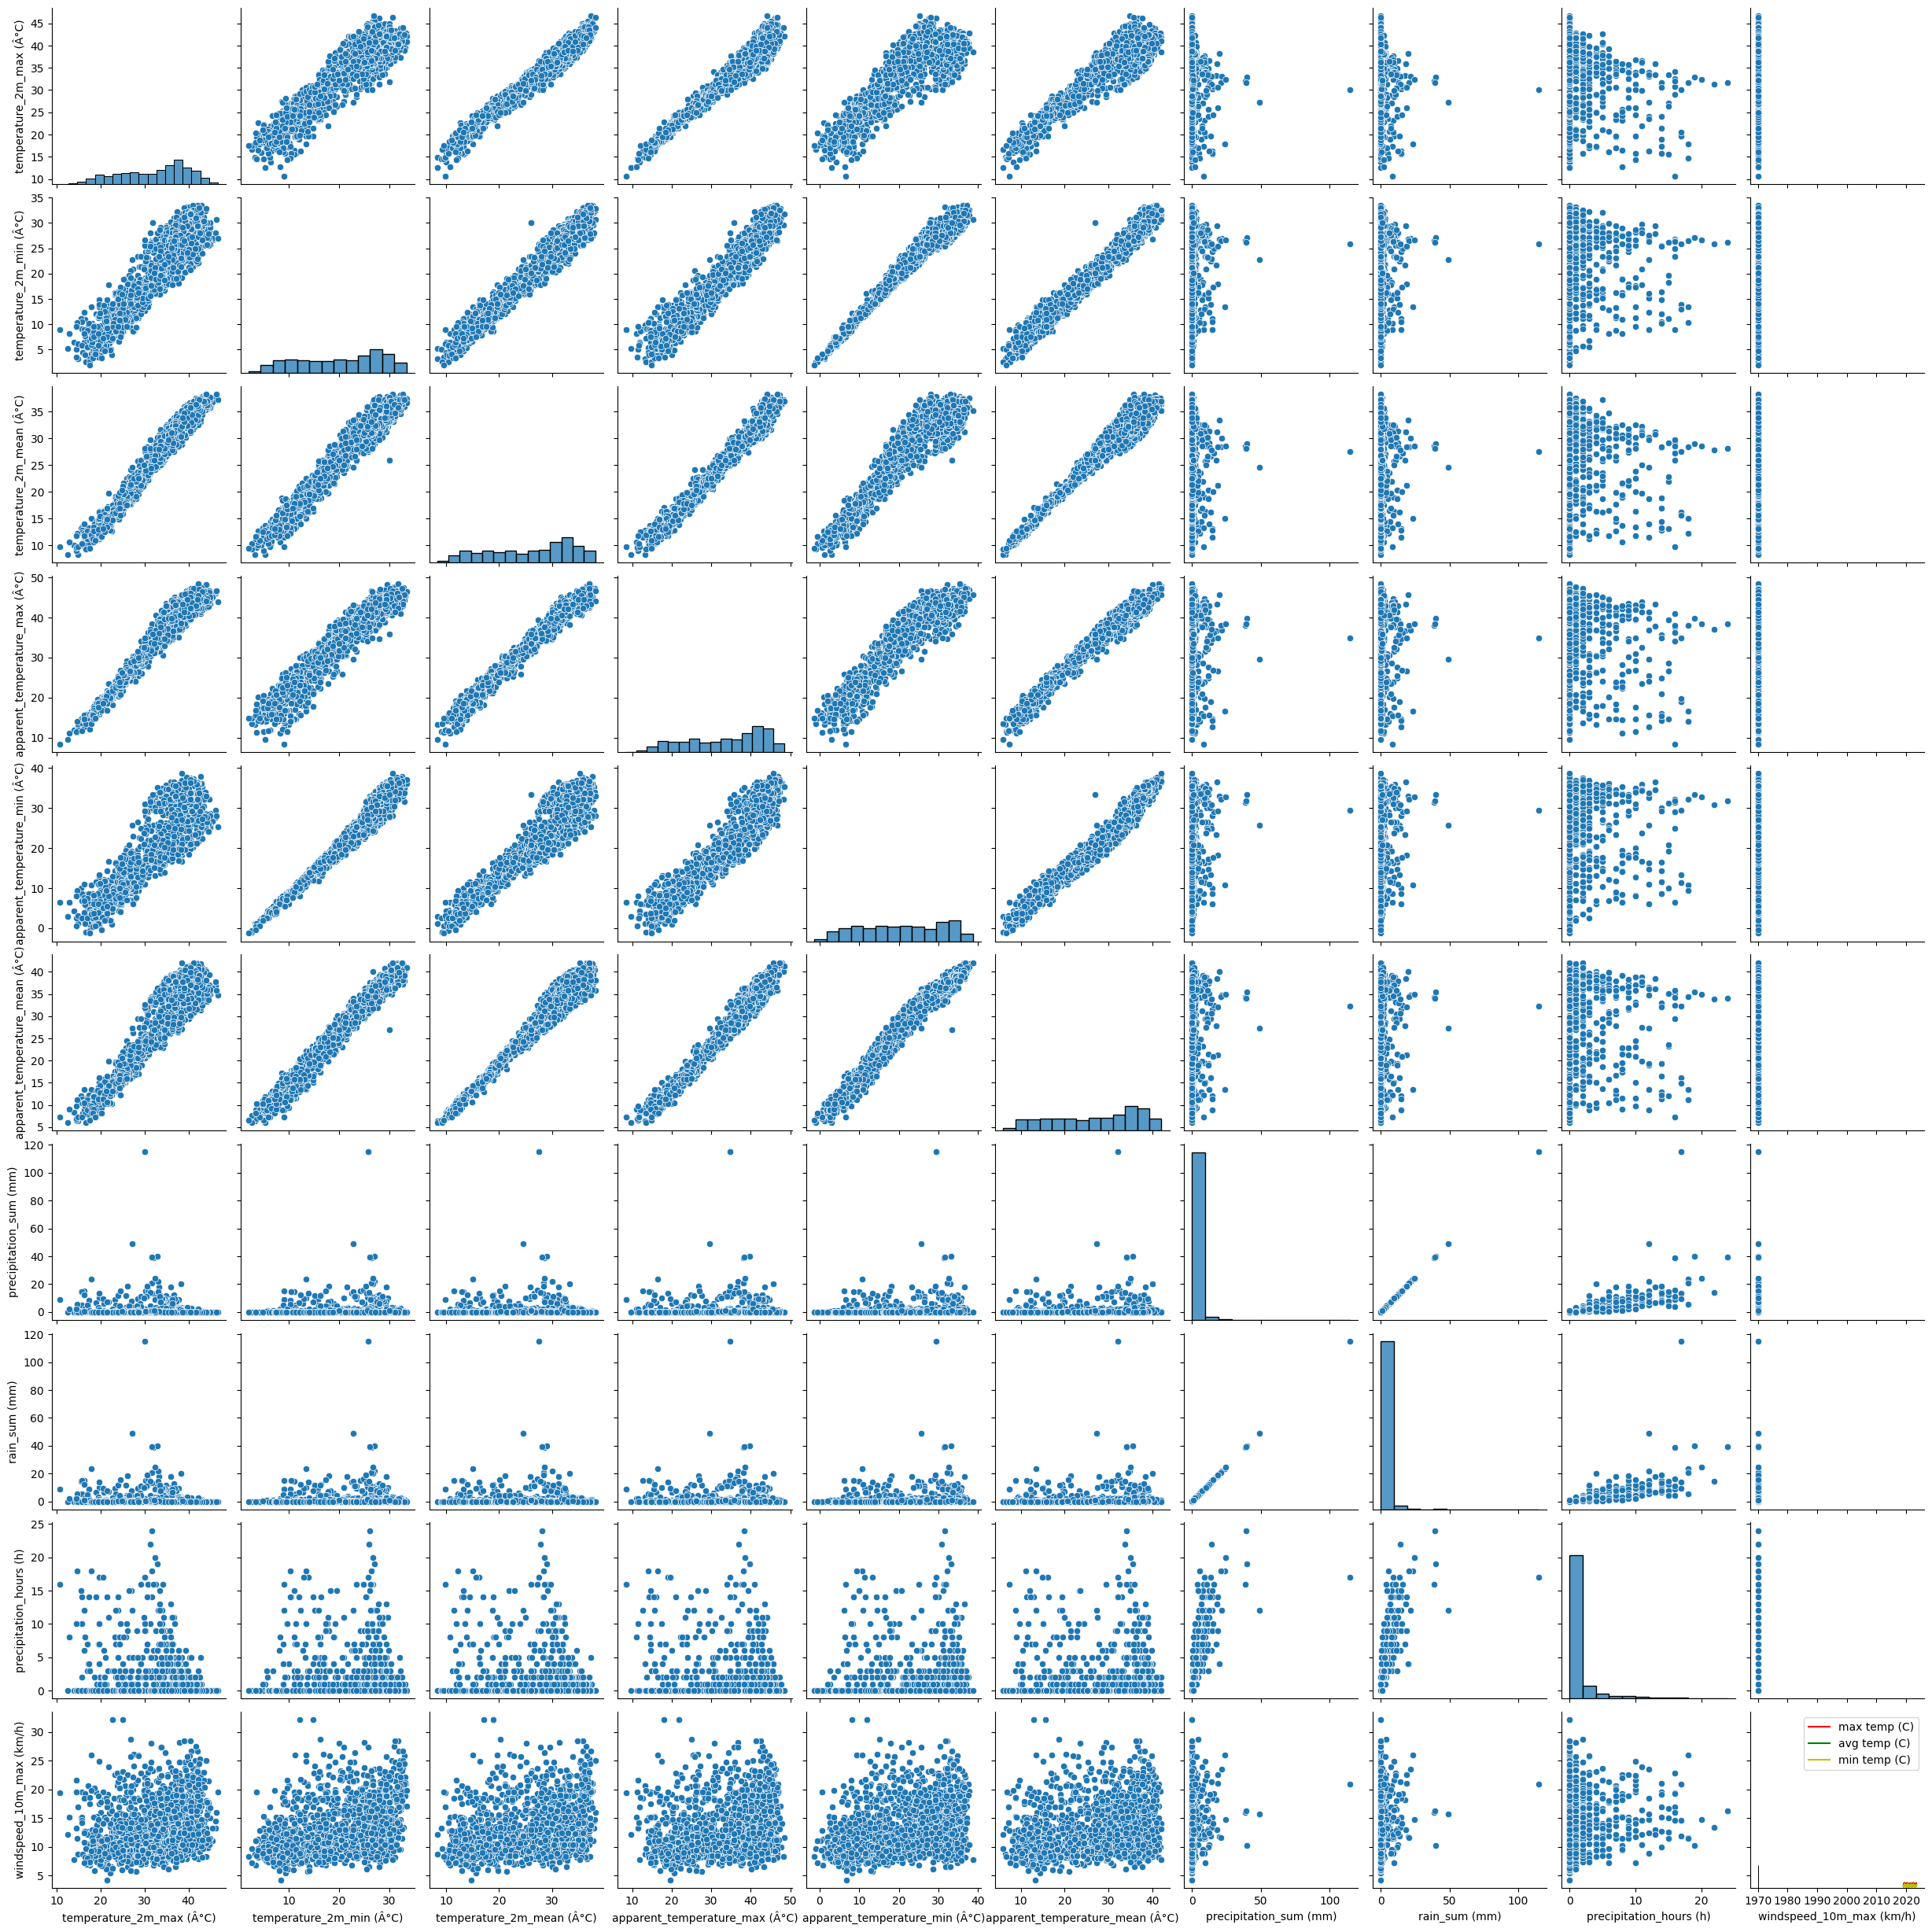

In [42]:
# Plotting the minimum and maximum and average temperatures against time
# Shows the pattern how they vary
#----------------------------------------------------------------

x = data["time"]

plt.plot(x, data["temperature_2m_max (Â°C)"], 'r-', label='max temp (C)')
plt.plot(x,data["temperature_2m_mean (Â°C)"],'g-',label = 'avg temp (C)')
plt.plot(x, data["temperature_2m_min (Â°C)"], 'y-', label='min temp (C)')
plt.legend()
plt.show()

In [43]:
# Neural Prophet works with only two columns so, slecting `apparent maximum temperature` against time
#----------------------------------------------------------------

cols = data[["time", "apparent_temperature_max (Â°C)"]]
cols.dropna(inplace = True)
cols.columns = ["ds", "y"]
cols.tail()

,ds,y
1566,2023-06-14,42.4000
1567,2023-06-15,41.4000
1568,2023-06-16,43.4000
1569,2023-06-17,35.8000
1570,2023-06-18,33.5403


In [44]:
# Preparing the model 
#----------------------------------------------------------------

model = NeuralProphet(n_lags=10, quantiles=[0.05, 0.95])

# For efficient prediction -> (set epoch = 5000) ; **it took almost 2 hours on my local machine and reduced MAE to 1.6...**
model.fit(cols, freq = 'D', epochs = 10)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (49) is too small than the required number for the learning rate finder (230). The results might not be optimal.


Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,35.273727,44.727818,2.504911,0.0,0
1,16.954678,19.174034,0.480006,0.0,1
2,5.595605,6.772695,0.041711,0.0,2
3,3.877456,4.832944,0.016153,0.0,3
4,3.468444,4.336137,0.009466,0.0,4
5,3.221630,4.060955,0.007323,0.0,5
6,3.118913,3.936908,0.006379,0.0,6
7,3.056476,3.853898,0.005929,0.0,7
8,3.023015,3.829984,0.005733,0.0,8
9,3.004961,3.796966,0.005642,0.0,9


In [45]:
# Predicting the future values
#----------------------------------------------------------------

# Periods parameter corresponds to the number of days used for prediction
future = model.make_future_dataframe(cols, periods=7)

print(future)

forecast = model.predict(future)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


           ds        y
0  2023-06-09  44.9000
1  2023-06-10  45.4000
2  2023-06-11  44.5000
3  2023-06-12  44.6000
4  2023-06-13  42.9000
5  2023-06-14  42.4000
6  2023-06-15  41.4000
7  2023-06-16  43.4000
8  2023-06-17  35.8000
9  2023-06-18  33.5403
10 2023-06-19      NaN


Predicting: 49it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [46]:
#Visualising the forecast
#----------------------------------------------------------------

# The ds variable corresponds to date
# yhat1 corresponds to `apparent maximum temperature` on that day

forecast.head()

,ds,y,yhat1,yhat1 5.0%,yhat1 95.0%,ar1,trend,season_yearly,season_weekly
0,2023-06-09,44.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-06-10,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-06-11,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-12,44.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-06-13,42.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Plotting the predictions
#----------------------------------------------------------------

model.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)


FigureWidgetResampler({
    'data': [{'fillcolor': 'rgba(45, 146, 255, 0.2)',
              'line': {'color': 'rgba(45, 146, 255, 0.2)', 'width': 1},
              'mode': 'lines',
              'name': 'yhat1 5.0%',
              'type': 'scatter',
              'uid': '89d2b0ee-41c2-4a02-9a37-c5014da046ed',
              'x': array([datetime.datetime(2023, 6, 9, 0, 0),
                          datetime.datetime(2023, 6, 10, 0, 0),
                          datetime.datetime(2023, 6, 11, 0, 0),
                          datetime.datetime(2023, 6, 12, 0, 0),
                          datetime.datetime(2023, 6, 13, 0, 0),
                          datetime.datetime(2023, 6, 14, 0, 0),
                          datetime.datetime(2023, 6, 15, 0, 0),
                          datetime.datetime(2023, 6, 16, 0, 0),
                          datetime.datetime(2023, 6, 17, 0, 0),
                          datetime.datetime(2023, 6, 18, 0, 0),
                          datetime.datetime(2023, 

In [48]:
model.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': '05f68f81-fb17-43d4-9249-30153f8777e4',
              'x': array([datetime.datetime(2019, 3, 1, 0, 0),
                          datetime.datetime(2019, 3, 2, 0, 0),
                          datetime.datetime(2019, 3, 3, 0, 0), ...,
                          datetime.datetime(2023, 6, 15, 0, 0),
                          datetime.datetime(2023, 6, 16, 0, 0),
                          datetime.datetime(2023, 6, 18, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ -6.07002155,  -6.07582103,  -6.08162051, ..., -21.30554185,
                          -21.30789835, -21.31261137]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'na